## Data Preparation

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Encoding categorical variables
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder

# Statistical analysis
import statsmodels.api as sm

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import tree, ensemble, linear_model, svm, neighbors
from sklearn.model_selection import cross_validate, StratifiedKFold

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Feature selection
from sklearn.feature_selection import RFECV

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#PCA
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Other
from importlib import reload  # Reload modules
import time  # Timing code execution


In [3]:
# Set Working Directory
import os
os.chdir("/Users/sugianto/Desktop/Machine Learning/COURSEWORK")

In [4]:
# Upload the dataset from Github
# GitHub raw CSV URL
data = 'https://raw.githubusercontent.com/kanadagcs/Obesity-Dataset/main/ObesityDataSet.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(data)

In [5]:
# Read the first five datapoints
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [6]:
# Generate descriptive statistics
description = data.describe(include='object')
print(description)

       Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351  


In [7]:
# BMI Calculation
data['BMI'] = data['Weight']/(data['Height']**2)

# Display the first few rows of the dataset
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad        BMI  
0  Public_Transportation        Normal_Weight  24.386526  
1  Public_Transportation        Normal_Weight  24.238227  
2  Public_Transportation        Normal_Weight  23.765432  
3                Walking   Overweight_Level_I  26.851852  
4  Public_Transportation  Overweight_Level_II  28.342381

In [8]:
# Check for duplicated observations
print("There are", data.duplicated().sum(), "duplicated observation(s) in the dataset")

# Check for null observations
print("There are", data.isnull().sum().sum(), "null observation(s) in the dataset")

# Get duplicated rows
duplicated_rows = data[data.duplicated()]
print("Duplicated rows:\n", duplicated_rows)

There are 24 duplicated observation(s) in the dataset
There are 0 null observation(s) in the dataset
Duplicated rows:
      Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female 

In [9]:
# Drop duplicates
data2 = data.drop_duplicates(keep='last')
data2.shape

(2087, 18)

### Data Exploration

#### Numeric Variables
##### Use histograms to understand how the data is distributed.
##### Create heatmap to show the correlation 
##### Compare NObeyesdad levels across numeric variables using a pivot table.

#### Categorical Variables
##### Make bar charts to see the balance of classes in categorical variables.
##### Use pivot tables to explore the relationship between categorical variables and NObeyesdad levels.

In [10]:
# Set numeric and categorical values differently 
data_num = data2[['Age', 'Height', 'Weight','BMI']]
data_cat = data2[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']]

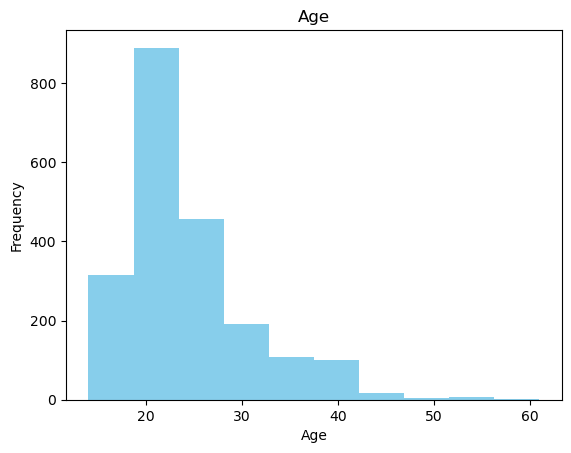

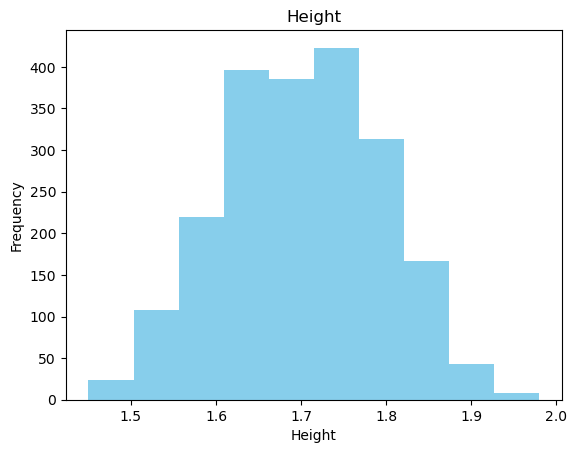

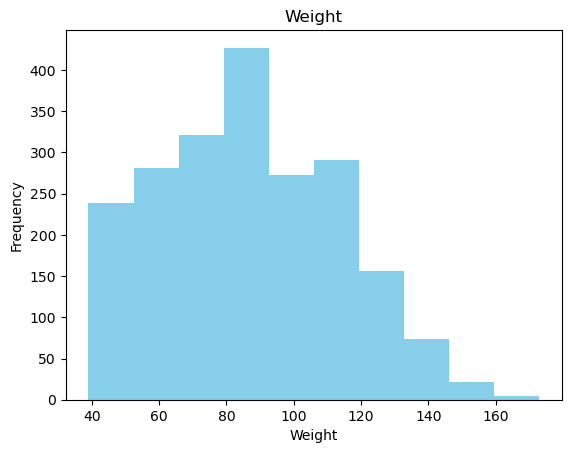

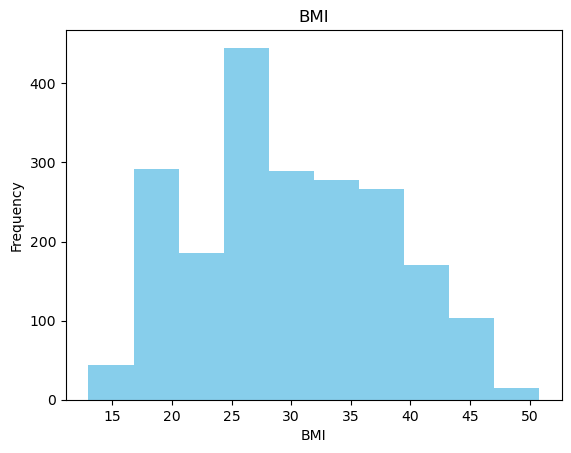

In [11]:
# Distributions for all numeric variables
hist_color = 'skyblue'
for col in data_num:
    plt.hist(data_num[col], color=hist_color)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

             Age    Height    Weight       BMI
Age     1.000000 -0.031748  0.198160  0.240769
Height -0.031748  1.000000  0.457468  0.124466
Weight  0.198160  0.457468  1.000000  0.934494
BMI     0.240769  0.124466  0.934494  1.000000


<Axes: >

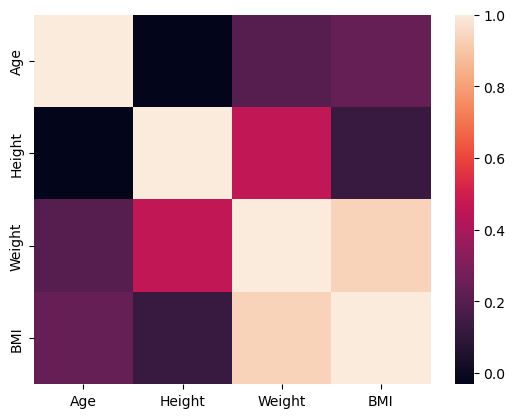

In [12]:
print(data_num.corr())
sns.heatmap(data_num.corr())

In [13]:
# Compare NObeyesdad levels across Age, Height, Weight
# It helps in understanding how 'Age', 'Height', and 'Weight' vary across different obesity levels.
pd.pivot_table(data2, index = 'NObeyesdad', values = ['Age','Height','Weight'])

Age    Height      Weight
NObeyesdad                                          
Insufficient_Weight  19.771687  1.693572   50.013190
Normal_Weight        21.758865  1.676950   62.164894
Obesity_Type_I       25.884941  1.693804   92.870198
Obesity_Type_II      28.233785  1.771795  115.305311
Obesity_Type_III     23.495554  1.687559  120.941114
Overweight_Level_I   23.540309  1.691277   74.483261
Overweight_Level_II  26.996981  1.703748   82.085271

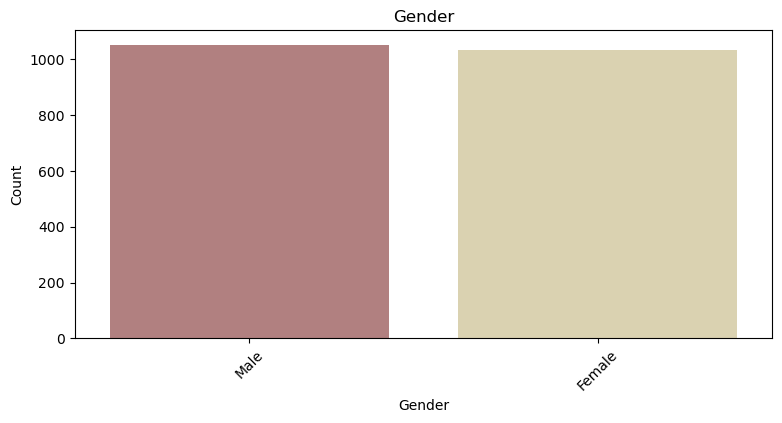

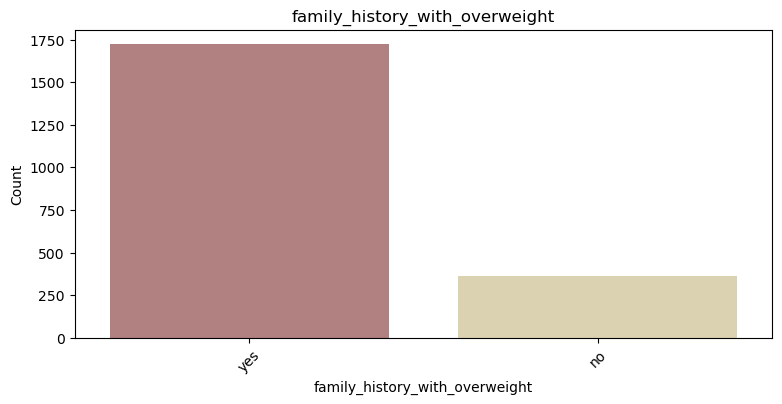

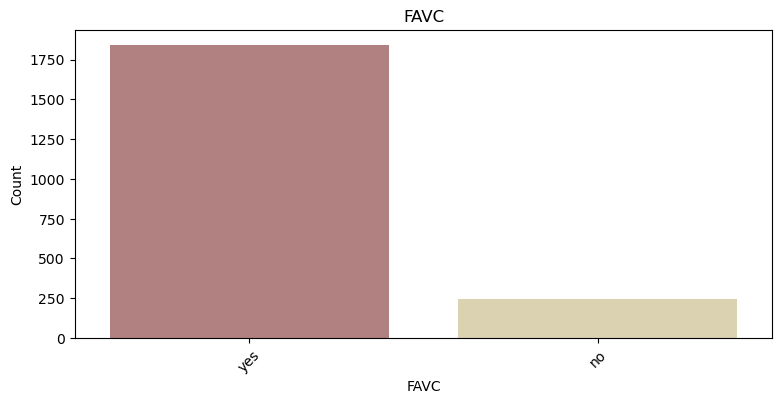

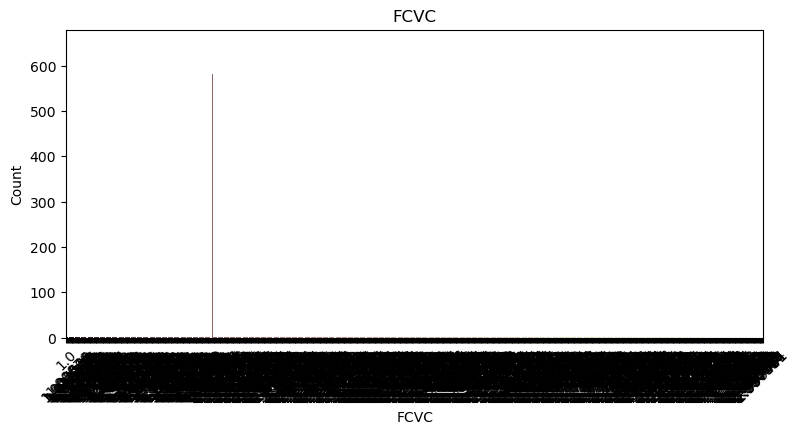

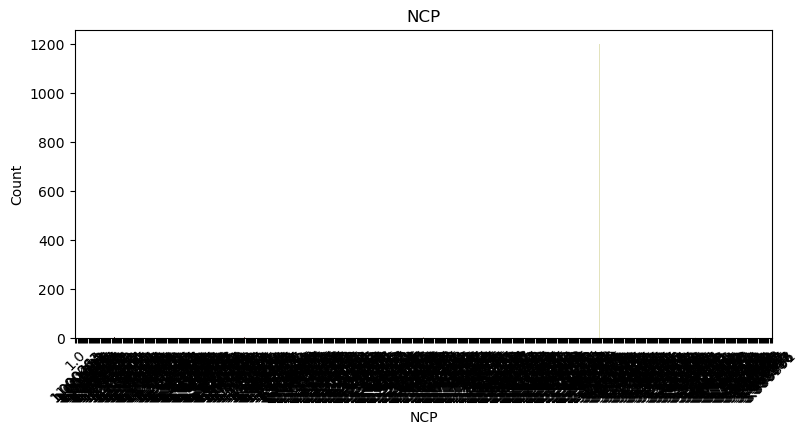

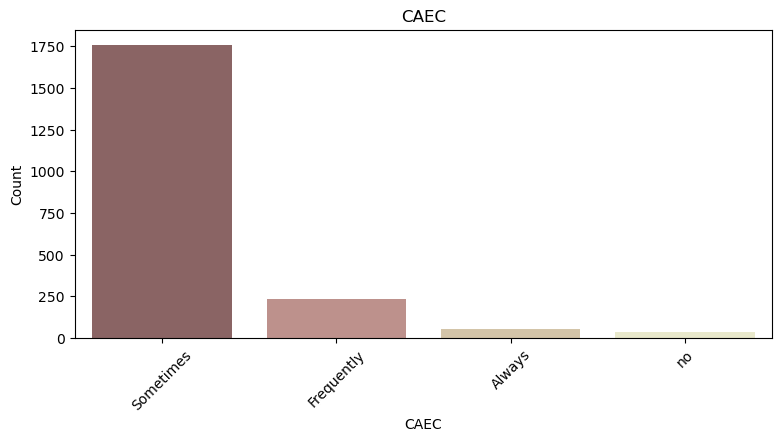

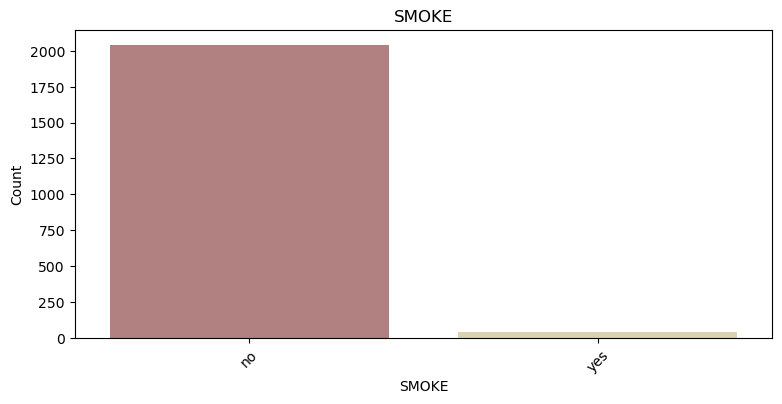

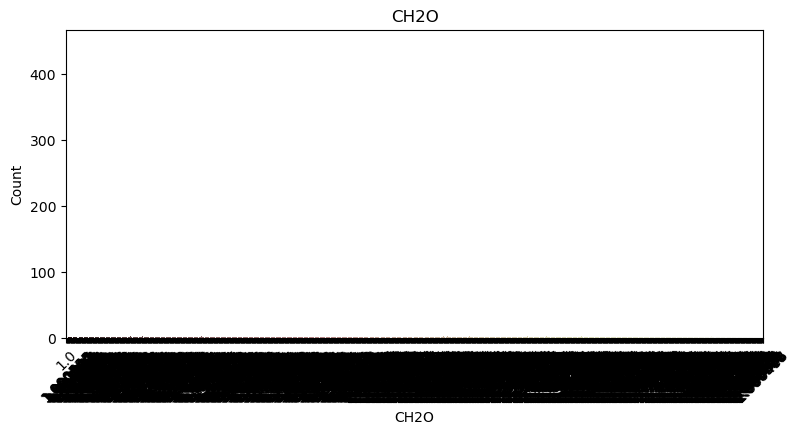

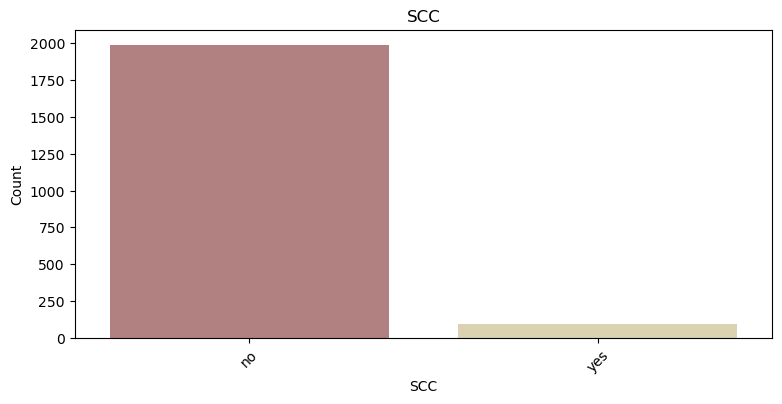

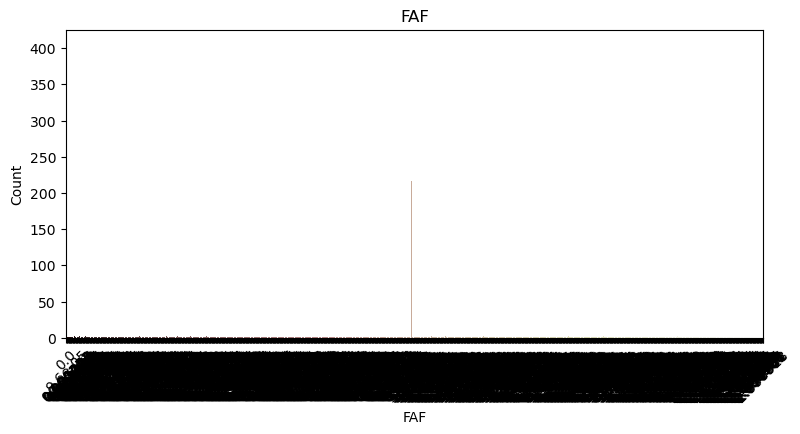

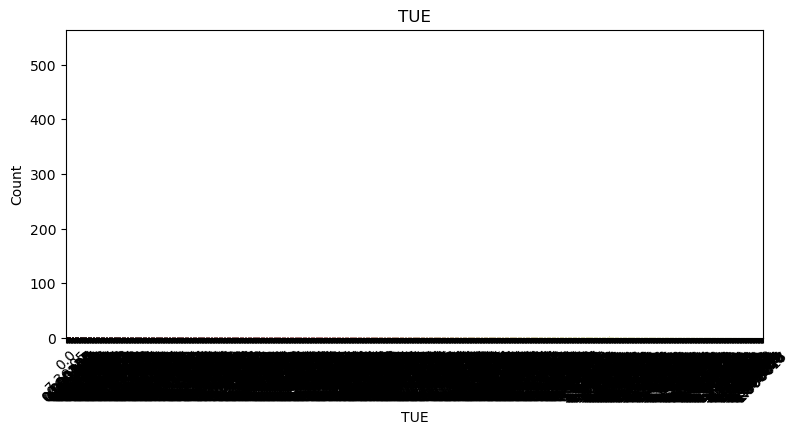

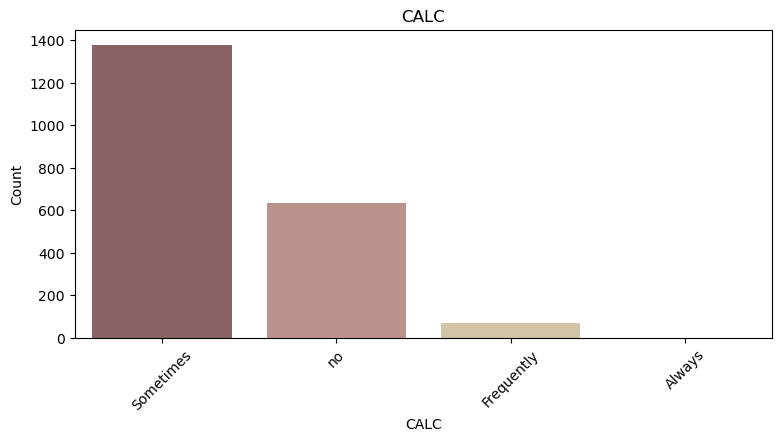

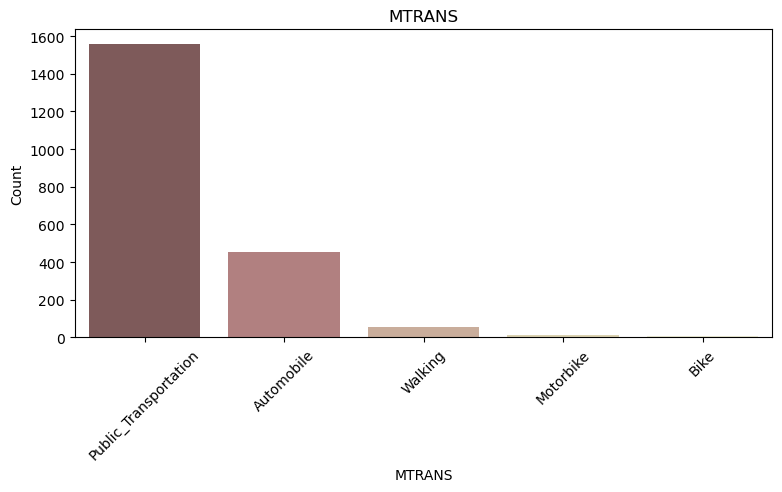

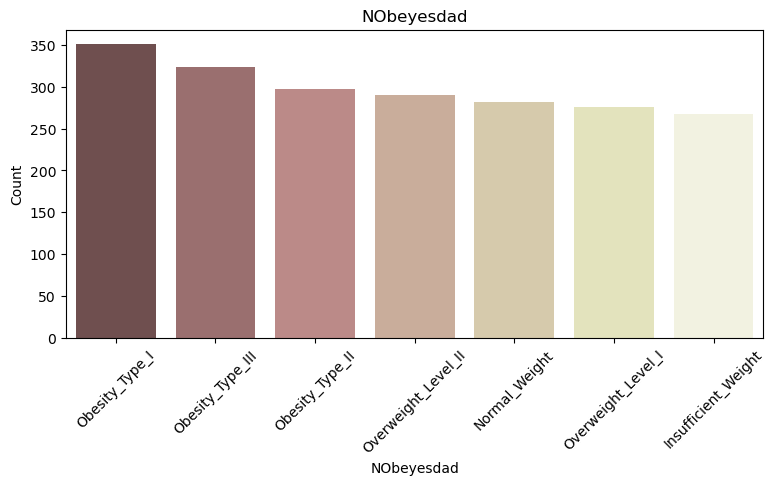

In [14]:
# Set color palette
palette = "pink"

# Create bar plots for all categorical variables
for col in data_cat.columns:
    plt.figure(figsize=(9, 4))
    sns.barplot(x=data_cat[col].value_counts().index, y=data_cat[col].value_counts(), palette=palette).set_title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [15]:
# Rounding
data2['Age'] = data2['Age'].apply(lambda age : round(age)) 
data2['Height'] = data2['Height'].apply(lambda height : round(height, 2)) 
data2['Weight'] = data2['Weight'].apply(lambda weight : round(weight)) 
data2['FCVC'] = data2['FCVC'].apply(lambda fcvc : round(fcvc)) 
data2['NCP'] = data2['NCP'].apply(lambda ncp : round(ncp)) 
data2['CH2O'] = data2['CH2O'].apply(lambda ch2o : round(ch2o)) 
data2['FAF'] = data2['FAF'].apply(lambda faf : round(faf)) 
data2['TUE'] = data2['TUE'].apply(lambda tue : round(tue))

# Print
data2

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62      64                            yes   no     2   
1     Female   21    1.52      56                            yes   no     3   
2       Male   23    1.80      77                            yes   no     2   
3       Male   27    1.80      87                             no   no     3   
4       Male   22    1.78      90                             no   no     2   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71     131                            yes  yes     3   
2107  Female   22    1.75     134                            yes  yes     3   
2108  Female   23    1.75     134                            yes  yes     3   
2109  Female   24    1.74     133                            yes  yes     3   
2110  Female   24    1.74     133                            yes  yes     3   

      NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0       3  Sometimes    no     2   no    0    1          no   
1       3  Sometimes   yes     3  yes    3    0   Sometimes   
2       3  Sometimes    no     2   no    2    1  Frequently   
3       3  Sometimes    no     2   no    2    0  Frequently   
4       1  Sometimes    no     2   no    0    0   Sometimes   
...   ...        ...   ...   ...  ...  ...  ...         ...   
2106    3  Sometimes    no     2   no    2    1   Sometimes   
2107    3  Sometimes    no     2   no    1    1   Sometimes   
2108    3  Sometimes    no     2   no    1    1   Sometimes   
2109    3  Sometimes    no     3   no    1    1   Sometimes   
2110    3  Sometimes    no     3   no    1    1   Sometimes   

                     MTRANS           NObeyesdad        BMI  
0     Public_Transportation        Normal_Weight  24.386526  
1     Public_Transportation        Normal_Weight  24.238227  
2     Public_Transportation        Normal_Weight  23.765432  
3                   Walking   Overweight_Level_I  26.851852  
4     Public_Transportation  Overweight_Level_II  28.342381  
...                     ...                  ...        ...  
2106  Public_Transportation     Obesity_Type_III  44.901475  
2107  Public_Transportation     Obesity_Type_III  43.741923  
2108  Public_Transportation     Obesity_Type_III  43.543817  
2109  Public_Transportation     Obesity_Type_III  44.071535  
2110  Public_Transportation     Obesity_Type_III  44.144338  

[2087 rows x 18 columns]

## Data Analysis

<Axes: xlabel='NObeyesdad', ylabel='count'>

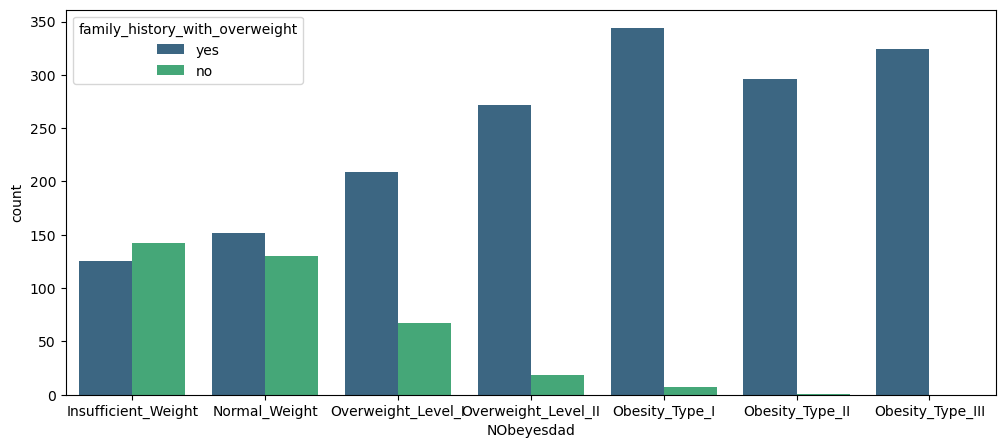

In [16]:
# Does family history with overweight affect Obesity level?
# Define the order of NObeyesdad categories from lowest to highest
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
         'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Create the countplot
plt.figure(figsize=(12, 5))
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', 
              data=data2, palette='viridis', order=order)

#### We can conclude that Family History with Overweight affects significantly to Obesity Levels

<Axes: xlabel='NObeyesdad', ylabel='count'>

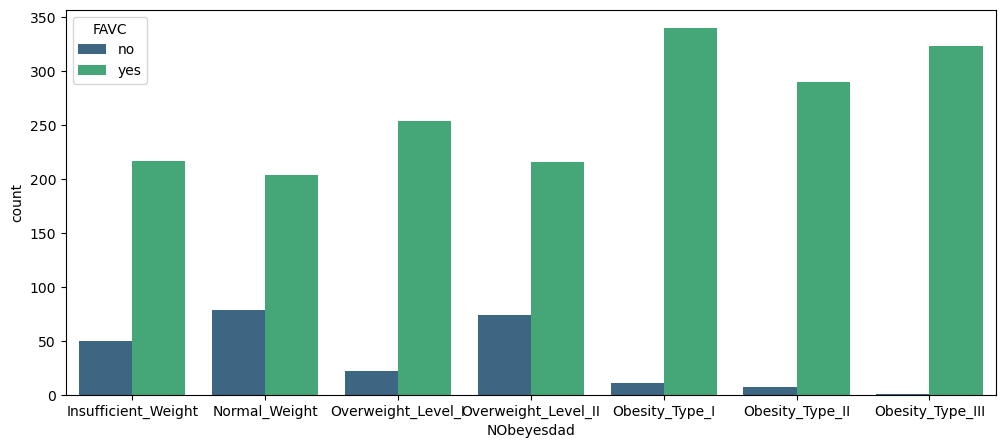

In [17]:
# Frequently indulge in high-calorie food
# Define the order of NObeyesdad categories from lowest to highest
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
         'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
plt.figure(figsize=(12,5)) 
sns.countplot(x='NObeyesdad', hue='FAVC', data=data2, palette='viridis', order=order)

#### We can deduce Family History with Overweight affects Obesity Levels

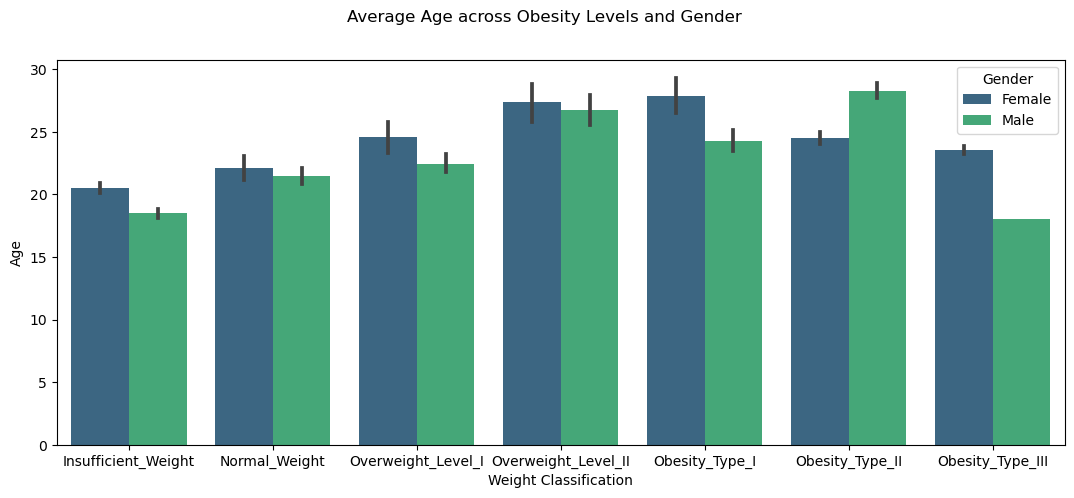

In [18]:
# What is the average age across obesity levels?

fig = plt.figure(figsize=(13, 5))
fig.suptitle("Average Age across Obesity Levels and Gender")
sns.barplot(x=data2.NObeyesdad, y=data2.Age, hue=data2.Gender, palette="viridis", order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
         'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xlabel("Weight Classification")
plt.ylabel("Age")
plt.show()


Text(0.5, 0, 'Weight Category')

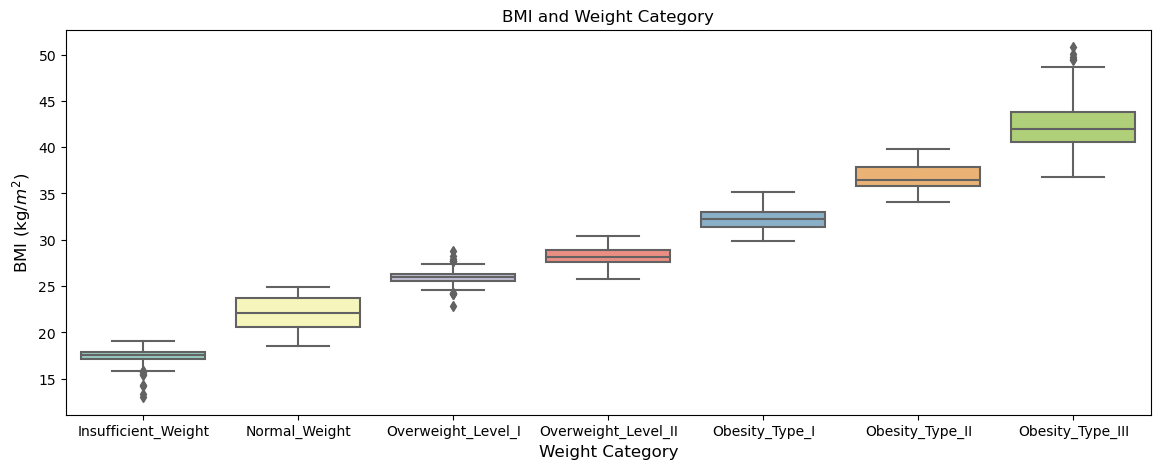

In [19]:
# What is the relationship between BMI and different weight categories
plt.figure(figsize=(14,5))
sns.boxplot(x='NObeyesdad', y='BMI', order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], data=data2, palette="Set3")
plt.title('BMI and Weight Category')
plt.ylabel("BMI (kg/$m^2$)", size=12)
plt.xlabel("Weight Category", size=12)

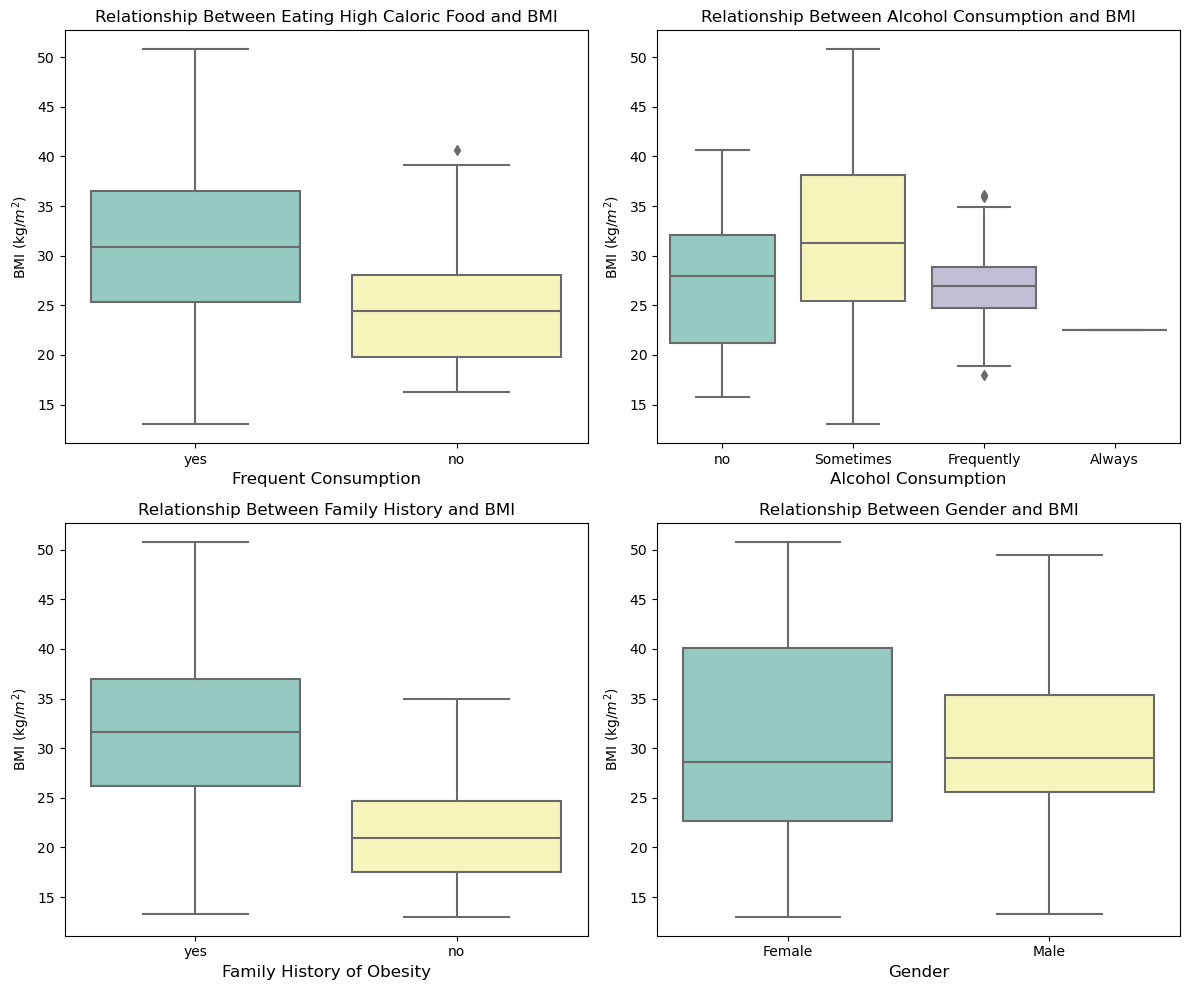

In [20]:
# Create subplots
plt.figure(figsize=(12, 10))

# Subplot 1 : High Caloric food
plt.subplot(2, 2, 1)
sns.boxplot(x='FAVC', y='BMI', order=["yes", "no"], data=data2, palette="Set3")
plt.title('Relationship Between Eating High Caloric Food and BMI')
plt.xlabel("Frequent Consumption", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=10)

# Subplot 2: Alcohol consumption
plt.subplot(2, 2, 2)
sns.boxplot(x='CALC', y='BMI', data=data2, palette="Set3")
plt.title('Relationship Between Alcohol Consumption and BMI')
plt.xlabel("Alcohol Consumption", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=10)

# Subplot 3: Family history
plt.subplot(2, 2, 3)
sns.boxplot(x='family_history_with_overweight', y='BMI', data=data2, palette="Set3")
plt.title('Relationship Between Family History and BMI')
plt.xlabel("Family History of Obesity", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=10)

# Subplot 4: Gender
plt.subplot(2, 2, 4)
sns.boxplot(x='Gender', y='BMI', data=data2, palette="Set3")
plt.title('Relationship Between Gender and BMI')
plt.xlabel("Gender", size=12)
plt.ylabel("BMI (kg/$m^2$)", size=10)

# Adjust spacing
plt.tight_layout()

# Show plot
plt.show()


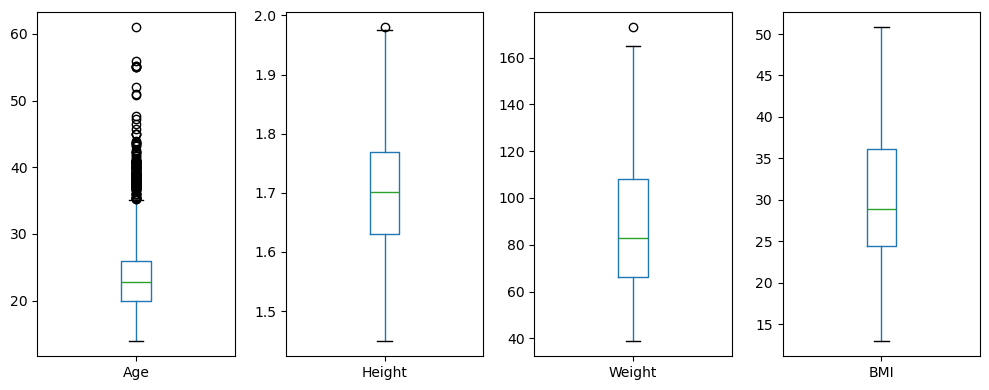

In [21]:
# Outliers Detection

plt.figure(figsize=(10,4))

for i, col in enumerate(list(data_num.columns.values)):
    plt.subplot(1,4,i+1)
    data_num.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [22]:
data_out = data.copy()
data_out = data_out[['Age', 'Height', 'Weight']]

In [23]:
# Check outliers with Z-score: Age column
outliers = []

def find_outliers_age(data):
    cut_std = 3
    mean = np.mean(data_out['Age'])
    std = np.std(data_out['Age'])

    for dataframe in data:

        z_score = (dataframe - mean)/std
        if np.abs(z_score)>=cut_std:
            outliers.append(dataframe)

    return outliers

In [24]:
# Looking at the Age outliers
outliers = find_outliers_age(data_out['Age'])
outliers

[52.0,
 55.0,
 61.0,
 44.0,
 55.0,
 45.0,
 51.0,
 56.0,
 45.0,
 55.24625,
 50.832559,
 45.0,
 55.137881,
 46.491859,
 55.022494,
 47.7061,
 45.821267,
 43.604901,
 43.510672,
 47.283374,
 43.591999,
 43.719395,
 43.37634,
 43.726081]

In [25]:
# Check outliers with Z-score: Weight column
outliers = []

def find_outliers_weight(data):
    cut_std = 3
    mean = np.mean(data_out['Weight'])
    std = np.std(data_out['Weight'])

    for dataframe in data:

        z_score = (dataframe - mean)/std
        if np.abs(z_score)>=cut_std:
            outliers.append(dataframe)

    return outliers

In [26]:
# Looking at Weight Outliers
outliers = find_outliers_weight(data_out['Weight'])
outliers

[173.0]

### How to determine Outliers with IQR?
#### To determine outliers using the Interquartile Range (IQR) method, follow these steps:

##### 1. Calculate the IQR: Subtract the 25th percentile (Q1) from the 75th percentile (Q3) of the data.
##### 2. Determine the lower bound: Multiply 1.5 times the IQR by the lower end (Q1).
##### 3. Determine the upper bound: Multiply 1.5 times the IQR by the upper end (Q3).
##### 4. Identify outliers.

In [27]:
# Finding Age percentile
Q1_Age, Q3_Age = np.percentile(data_out['Age'], [25,75])
print('Percentile 25 - Age column: ', Q1_Age)
print('Percentile 75 - Age column: ', Q3_Age)

Percentile 25 - Age column:  19.947192
Percentile 75 - Age column:  26.0


In [28]:
# Finding Weight percentile
Q1_Weight, Q3_Weight = np.percentile(data_out['Weight'], [25,75])
print('Percentile 25 - Weight column: ', Q1_Weight)
print('Percentile 75 - Weight column: ', Q3_Weight)

Percentile 25 - Weight column:  65.473343
Percentile 75 - Weight column:  107.430682


In [29]:
# IQR Calculation
IQR_Age = Q3_Age - Q1_Age
print('IQR_Age: ', IQR_Age)

IQR_Weight = Q3_Weight - Q1_Weight
print('IQR_Weight: ', IQR_Weight)

IQR_Age:  6.052807999999999
IQR_Weight:  41.957339000000005


In [30]:
# Determine the lower and upper bound

lower_bound_age = Q1_Age - (1.5 * IQR_Age)
upper_bound_age = Q3_Age + (1.5 * IQR_Age)

lower_bound_weight = Q1_Weight - (1.5 * IQR_Weight)
upper_bound_weight = Q3_Weight + (1.5 * IQR_Weight)

print('Lower Limit Age: ', lower_bound_age)
print('Upper Limit Age: ', upper_bound_age)
print()
print('Lower Limit Weight: ', lower_bound_weight)
print('Upper Limit Weight: ', upper_bound_weight)

Lower Limit Age:  10.867980000000003
Upper Limit Age:  35.079212

Lower Limit Weight:  2.537334499999993
Upper Limit Weight:  170.3666905


#### It can be concluded that any data points below the Lower Limits or above the Upper Limits for Age (10.86,35) or Weight (2.5,170) are considered outliers

In [31]:
data_iqr = data.copy()

data_iqr.drop(data_iqr[(data_iqr.Weight > 170.366) | (data_iqr.Weight < 2.53)].index, inplace = True)
data_iqr.drop(data_iqr[(data_iqr.Age > 35.07) | (data_iqr.Age < 10.86)].index, inplace = True)

data_iqr

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad        BMI  
0             no  Public_Transportation        Normal_Weight  24.386526  
1      Sometimes  Public_Transportation        Normal_Weight  24.238227  
2     Frequently  Public_Transportation        Normal_Weight  23.765432  
3     Frequently                Walking   Overweight_Level_I  26.851852  
4      Sometimes  Public_Transportation  Overweight_Level_II  28.342381  
...          ...                    ...                  ...        ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  44.901475  
2107   Sometimes  Public_Transportation     Obesity_Type_III  43.741923  
2108   Sometimes  Public_Transportation     Obesity_Type_III  43.543817  
2109   Sometimes  Public_Transportation     Obesity_Type_III  44.071535  
2110   Sometimes  Public_Transportation     Obesity_Type_III  44.144338  

[1942 rows x 18 columns]

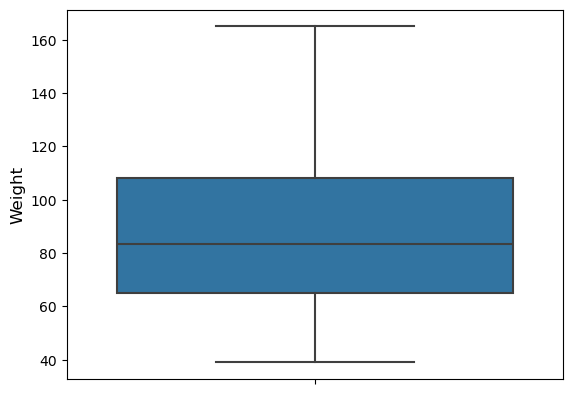

In [32]:
# Plot Weight boxplot 
sns.boxplot(y = "Weight", data = data_iqr)
plt.yticks(fontsize=10)
plt.ylabel('Weight', fontsize=12)
plt.show()

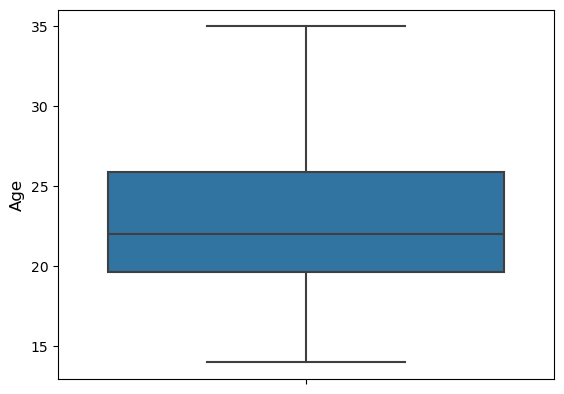

In [33]:
# Plot Age boxplot
sns.boxplot(y = "Age", data = data_iqr)
plt.yticks(fontsize=10)
plt.ylabel('Age', fontsize=12)
plt.show()

## Data Preprocessing

In [34]:
# Let's examine the number of labels for each variable
for col in data_iqr.columns:
    print(col, ': ', len(data_iqr[col].unique()), 'labels')

Gender :  2 labels
Age :  1260 labels
Height :  1450 labels
Weight :  1403 labels
family_history_with_overweight :  2 labels
FAVC :  2 labels
FCVC :  727 labels
NCP :  557 labels
CAEC :  4 labels
SMOKE :  2 labels
CH2O :  1156 labels
SCC :  2 labels
FAF :  1103 labels
TUE :  1089 labels
CALC :  4 labels
MTRANS :  5 labels
NObeyesdad :  7 labels
BMI :  1808 labels


In [35]:
# One-Hot Encoding is utilized for nominal categorical variables, where no ordering exists among the categories

# Create a copy of the data with IQR outliers removed
data_iqr_onehot = data_iqr.copy()

# Initialize the OneHotEncoder object
one_hot_encoding = OneHotEncoder(cols=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS'])

# Fit and transform the data
data_onehot = one_hot_encoding.fit_transform(data_iqr_onehot)

# Display the transformed data
data_onehot

Gender_1  Gender_2        Age    Height      Weight  \
0            1         0  21.000000  1.620000   64.000000   
1            1         0  21.000000  1.520000   56.000000   
2            0         1  23.000000  1.800000   77.000000   
3            0         1  27.000000  1.800000   87.000000   
4            0         1  22.000000  1.780000   89.800000   
...        ...       ...        ...       ...         ...   
2106         1         0  20.976842  1.710730  131.408528   
2107         1         0  21.982942  1.748584  133.742943   
2108         1         0  22.524036  1.752206  133.689352   
2109         1         0  24.361936  1.739450  133.346641   
2110         1         0  23.664709  1.738836  133.472641   

      family_history_with_overweight_1  family_history_with_overweight_2  \
0                                    1                                 0   
1                                    1                                 0   
2                                    1                                 0   
3                                    0                                 1   
4                                    0                                 1   
...                                ...                               ...   
2106                                 1                                 0   
2107                                 1                                 0   
2108                                 1                                 0   
2109                                 1                                 0   
2110                                 1                                 0   

      FAVC_1  FAVC_2  FCVC  ...       FAF       TUE        CALC  MTRANS_1  \
0          1       0   2.0  ...  0.000000  1.000000          no         1   
1          1       0   3.0  ...  3.000000  0.000000   Sometimes         1   
2          1       0   2.0  ...  2.000000  1.000000  Frequently         1   
3          1       0   3.0  ...  2.000000  0.000000  Frequently         0   
4          1       0   2.0  ...  0.000000  0.000000   Sometimes         1   
...      ...     ...   ...  ...       ...       ...         ...       ...   
2106       0       1   3.0  ...  1.676269  0.906247   Sometimes         1   
2107       0       1   3.0  ...  1.341390  0.599270   Sometimes         1   
2108       0       1   3.0  ...  1.414209  0.646288   Sometimes         1   
2109       0       1   3.0  ...  1.139107  0.586035   Sometimes         1   
2110       0       1   3.0  ...  1.026452  0.714137   Sometimes         1   

      MTRANS_2  MTRANS_3  MTRANS_4  MTRANS_5           NObeyesdad        BMI  
0            0         0         0         0        Normal_Weight  24.386526  
1            0         0         0         0        Normal_Weight  24.238227  
2            0         0         0         0        Normal_Weight  23.765432  
3            1         0         0         0   Overweight_Level_I  26.851852  
4            0         0         0         0  Overweight_Level_II  28.342381  
...        ...       ...       ...       ...                  ...        ...  
2106         0         0         0         0     Obesity_Type_III  44.901475  
2107         0         0         0         0     Obesity_Type_III  43.741923  
2108         0         0         0         0     Obesity_Type_III  43.543817  
2109         0         0         0         0     Obesity_Type_III  44.071535  
2110         0         0         0         0     Obesity_Type_III  44.144338  

[1942 rows x 27 columns]

In [36]:
# Ordinal Encoding: used for ordinal categorical variables
# Cols: CAEC, CALC, NObeyesdad

ord_enc = OrdinalEncoder(mapping= 
[{'col': 'CAEC', 'mapping': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}},
{'col': 'CALC', 'mapping': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}},
{'col':'NObeyesdad','mapping':{'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}}])


In [37]:
data_ord_encoding = ord_enc.fit_transform(data_onehot)
data_ord_encoding

Gender_1  Gender_2        Age    Height      Weight  \
0            1         0  21.000000  1.620000   64.000000   
1            1         0  21.000000  1.520000   56.000000   
2            0         1  23.000000  1.800000   77.000000   
3            0         1  27.000000  1.800000   87.000000   
4            0         1  22.000000  1.780000   89.800000   
...        ...       ...        ...       ...         ...   
2106         1         0  20.976842  1.710730  131.408528   
2107         1         0  21.982942  1.748584  133.742943   
2108         1         0  22.524036  1.752206  133.689352   
2109         1         0  24.361936  1.739450  133.346641   
2110         1         0  23.664709  1.738836  133.472641   

      family_history_with_overweight_1  family_history_with_overweight_2  \
0                                    1                                 0   
1                                    1                                 0   
2                                    1                                 0   
3                                    0                                 1   
4                                    0                                 1   
...                                ...                               ...   
2106                                 1                                 0   
2107                                 1                                 0   
2108                                 1                                 0   
2109                                 1                                 0   
2110                                 1                                 0   

      FAVC_1  FAVC_2  FCVC  ...       FAF       TUE  CALC  MTRANS_1  MTRANS_2  \
0          1       0   2.0  ...  0.000000  1.000000     0         1         0   
1          1       0   3.0  ...  3.000000  0.000000     1         1         0   
2          1       0   2.0  ...  2.000000  1.000000     2         1         0   
3          1       0   3.0  ...  2.000000  0.000000     2         0         1   
4          1       0   2.0  ...  0.000000  0.000000     1         1         0   
...      ...     ...   ...  ...       ...       ...   ...       ...       ...   
2106       0       1   3.0  ...  1.676269  0.906247     1         1         0   
2107       0       1   3.0  ...  1.341390  0.599270     1         1         0   
2108       0       1   3.0  ...  1.414209  0.646288     1         1         0   
2109       0       1   3.0  ...  1.139107  0.586035     1         1         0   
2110       0       1   3.0  ...  1.026452  0.714137     1         1         0   

      MTRANS_3  MTRANS_4  MTRANS_5  NObeyesdad        BMI  
0            0         0         0           1  24.386526  
1            0         0         0           1  24.238227  
2            0         0         0           1  23.765432  
3            0         0         0           2  26.851852  
4            0         0         0           3  28.342381  
...        ...       ...       ...         ...        ...  
2106         0         0         0           6  44.901475  
2107         0         0         0           6  43.741923  
2108         0         0         0           6  43.543817  
2109         0         0         0           6  44.071535  
2110         0         0         0           6  44.144338  

[1942 rows x 27 columns]

## Supervised Learning

### Regression

In [38]:
#Ordinary Least Squares, 

X = data_ord_encoding.iloc[:, :-1]
y = data_ord_encoding.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y,X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.454e+04
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:32:16   Log-Likelihood:                -1970.9
No. Observations:                1942   AIC:                             3984.
Df Residuals:                    1921   BIC:                             4101.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### The model demonstrates a high R-squared value of 0.993, indicating that approximately 99.3% of the variance in the target variable is explained by the features. This suggests a strong fit of the model to the data.

#### TUE is not statistically significant, while CH2O and CALC are borderline, indicating they are close to but not definitively statistically significant.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Original model
X_before = data_ord_encoding.drop(['NObeyesdad'], axis=1)
y_before = data_ord_encoding['NObeyesdad']

# Add constant to X_before
X_before = sm.add_constant(X_before)

# Fit OLS model before dropping features
model_before = sm.OLS(y_before, X_before)
results_before = model_before.fit()
y_pred_before = results_before.predict(X_before)

# Calculate metrics before dropping features
r_squared_before = results_before.rsquared
mae_before = mean_absolute_error(y_before, y_pred_before)
mse_before = mean_squared_error(y_before, y_pred_before)

print("Before Dropping Non-Significant Features:")
print("R-squared:", r_squared_before)
print("MAE:", mae_before)
print("MSE:", mse_before)


Before Dropping Non-Significant Features:
R-squared: 0.9651973600885313
MAE: 0.29398671725031017
MSE: 0.14473334671064433


In [40]:
# New model without non-significant features
X_after = data_ord_encoding.drop(['CALC', 'CH2O', 'TUE', 'NObeyesdad'], axis=1)
y_after = data_ord_encoding['NObeyesdad']

# Add constant to X_after
X_after = sm.add_constant(X_after)

# Fit OLS model after dropping features
model_after = sm.OLS(y_after, X_after)
results_after = model_after.fit()
y_pred_after = results_after.predict(X_after)

# Calculate metrics after dropping features
r_squared_after = results_after.rsquared
mae_after = mean_absolute_error(y_after, y_pred_after)
mse_after = mean_squared_error(y_after, y_pred_after)

print("\nAfter Dropping Non-Significant Features:")
print("R-squared:", r_squared_after)
print("MAE:", mae_after)
print("MSE:", mse_after)


After Dropping Non-Significant Features:
R-squared: 0.9649708994917118
MAE: 0.2960713250228398
MSE: 0.1456751258446165


#### Prediction of BMI using Regression Models

In [41]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# List of regression models
models = [
    ("Linear Regression", LinearRegression()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=23)),
    ("Random Forest", RandomForestRegressor(random_state=23)),
    ("Neural Network", MLPRegressor(random_state=23))
]

# Dictionary to store model performance
results = {}

# Fit each model, make predictions, and calculate metrics
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE       MSE      RMSE        R2
Linear Regression  0.545771  0.494831  0.703442  0.992242
Gradient Boosting  0.480897  0.396306  0.629529  0.993787
Random Forest      0.291452  0.172742  0.415622  0.997292
Neural Network     0.983106  1.536443  1.239533  0.975912


### Classification

#### Preprocessing

In [42]:
X = data.drop(["Weight", "Height", "NObeyesdad"], axis=1)
y = data["NObeyesdad"]

In [43]:
#Define a dictionary to link obesity status with corresponding numerical values
obesity_status_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Map the obesity status to numerical values based on obesity severity
y = y.map(obesity_status_mapping)
y.head()

0    1
1    1
2    1
3    2
4    3
Name: NObeyesdad, dtype: int64

In [44]:
#Select Categorical Columns
dummies_cols = X[["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]]

# One-Hot Encoding
X_dummies = pd.get_dummies(dummies_cols,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"], drop_first=True)
# Select Numeric Columns
X_num = X.select_dtypes(include=['float64', 'int64'])

# Concatenate DataFrames
X = pd.concat([X_num, X_dummies], axis=1)
X.head()

Age  FCVC  NCP  CH2O  FAF  TUE        BMI  Gender_Male  \
0  21.0   2.0  3.0   2.0  0.0  1.0  24.386526        False   
1  21.0   3.0  3.0   3.0  3.0  0.0  24.238227        False   
2  23.0   2.0  3.0   2.0  2.0  1.0  23.765432         True   
3  27.0   3.0  3.0   2.0  2.0  0.0  26.851852         True   
4  22.0   2.0  1.0   2.0  0.0  0.0  28.342381         True   

   family_history_with_overweight_yes  FAVC_yes  ...  CAEC_no  SMOKE_yes  \
0                                True     False  ...    False      False   
1                                True     False  ...    False       True   
2                                True     False  ...    False      False   
3                               False     False  ...    False      False   
4                               False     False  ...    False      False   

   SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0    False            False           False     True        False   
1     True            False            True    False        False   
2    False             True           False    False        False   
3    False             True           False    False        False   
4    False            False            True    False        False   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0             False                          True           False  
1             False                          True           False  
2             False                          True           False  
3             False                         False            True  
4             False                          True           False  

[5 rows x 22 columns]

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=23, stratify=y)

# Print the shapes of training and testing sets
print(f' X_train: {X_train.shape[0]}  |  y_train: {y_train.shape[0]}')
print(f' X_test :  {X_test.shape[0]}  |  y_test: {y_test.shape[0]}')

 X_train: 1688  |  y_train: 1688
 X_test :  423  |  y_test: 423


In [46]:
# Scaling the numerical columns of both the training and testing datasets separately to ensure that the model is not biased by the scale of the features. 
cols = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

std_scaler = StandardScaler()

X_train[cols] = std_scaler.fit_transform(X_train[cols])
X_test[cols] = std_scaler.transform(X_test[cols])

print(f'X_train: {X_train.shape[0]}') 
print(f'X_test : {X_test.shape[0]}')


X_train: 1688
X_test : 423


In [47]:
random_state = 23

# List of classifiers to evaluate
classifiers = [
    tree.DecisionTreeClassifier(random_state=random_state),
    ensemble.RandomForestClassifier(random_state=random_state),
    linear_model.LogisticRegression(random_state=random_state),
    ensemble.AdaBoostClassifier(random_state=random_state),
    svm.SVC(random_state=random_state),
    svm.LinearSVC(random_state=random_state),
    neighbors.KNeighborsClassifier(),
]

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=23)

# Metrics to compute
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# DataFrame to store results
MLA_columns = ['Name','Accuracy','Recall', 'Precision', 'F1_score', 'Accuracy_std']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# Perform cross-validation and compute metrics
row_index = 0
for clf in classifiers:
    cv_results = cross_validate(clf, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    
    MLA_name = clf.__class__.__name__
    MLA_compare.loc[row_index, 'Name'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy'] = round(cv_results['test_accuracy'].mean(), 3)
    MLA_compare.loc[row_index, 'Recall'] = round(cv_results['test_recall_macro'].mean(), 3)
    MLA_compare.loc[row_index, 'Precision'] = round(cv_results['test_precision_macro'].mean(), 3)
    MLA_compare.loc[row_index, 'F1_score'] = round(cv_results['test_f1_macro'].mean(), 3)
    MLA_compare.loc[row_index, 'Accuracy_std'] = round(cv_results['test_accuracy'].std(), 3)
    
    row_index += 1

MLA_compare.sort_values(by = ['Accuracy'], ascending = False, inplace = True)
MLA_compare


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Name Accuracy Recall Precision F1_score Accuracy_std
1  RandomForestClassifier    0.972  0.971     0.973    0.971        0.009
0  DecisionTreeClassifier    0.969  0.968     0.969    0.968        0.018
6    KNeighborsClassifier    0.958  0.957      0.96    0.956        0.009
4                     SVC    0.922  0.921     0.931    0.918        0.012
2      LogisticRegression    0.726  0.721     0.714     0.71        0.029
5               LinearSVC    0.632  0.636     0.682    0.607         0.05
3      AdaBoostClassifier    0.553  0.551     0.399    0.441        0.045

In [48]:
#Evaluate the Random Forest model on the test set and assess the risk of overfitting

# Instantiate the Random Forest Classifier
rf_classifier = ensemble.RandomForestClassifier(random_state=23)

# Train the model on the entire training data
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy on Test Set: {accuracy:.3f}")
print(f"Precision on Test Set: {precision:.3f}")
print(f"Recall on Test Set: {recall:.3f}")
print(f"F1-score on Test Set: {f1:.3f}")

# Check if there's a risk of overfitting
if accuracy > MLA_compare['Accuracy'].max():
    print("The model might be overfitting the training data.")
else:
    print("The model is performing consistently with the cross-validation results.")


Accuracy on Test Set: 0.981
Precision on Test Set: 0.982
Recall on Test Set: 0.980
F1-score on Test Set: 0.980
The model might be overfitting the training data.


In [49]:
#Performing hyperparameter tuning using GridSearchCV with a Random Forest Classifier.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=23)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [50]:
#Evaluating the Random Forest Classifier with the best hyperparameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision on Test Set:", precision)
print("Recall on Test Set:", recall)
print("F1-score on Test Set:", f1)


Precision on Test Set: 0.9842940057903599
Recall on Test Set: 0.983451536643026
F1-score on Test Set: 0.9834947126386607


In [82]:
# OOB Score

# Create a Random Forest classifier with hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, oob_score=True)

# Fit the model
rf_model.fit(X_train, y_train)

# Obtain the OOB score
oob_score = rf_model.oob_score_
print("Out-of-Bag (OOB) Score:", oob_score)


Out-of-Bag (OOB) Score: 0.9638625592417062


In [52]:
diff_oob = round(abs(oob_score - accuracy),4)
print("Out-of-Bag (OOB) Score:", oob_score)
print("Accuracy on Test Set:", accuracy)
print('Acc. Difference:\t\t', diff_oob)

Out-of-Bag (OOB) Score: 0.9638625592417062
Accuracy on Test Set: 0.983451536643026
Acc. Difference:		 0.0196


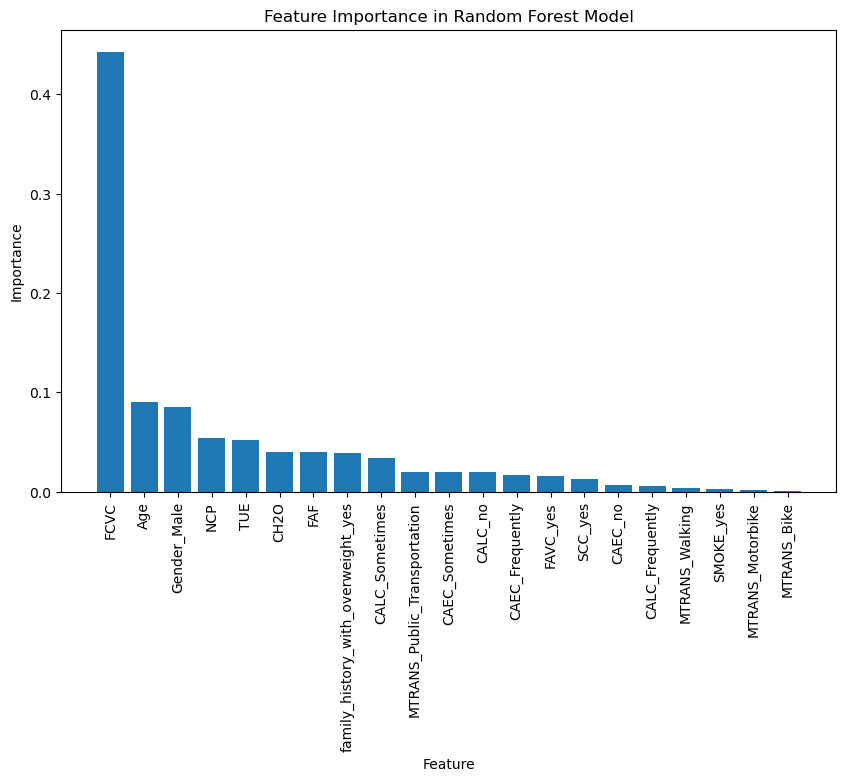

In [53]:
# Analyse Feature Importance in RF model

# Get feature importances from the model
feature_importances = best_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names based on feature importances
names = [X.columns[i] for i in indices]

# Exclude BMI from the list of features
names_without_bmi = [name for name in names if name != 'BMI']

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(names_without_bmi)), feature_importances[indices[:-1]])
plt.xticks(range(len(names_without_bmi)), names_without_bmi, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()


#### The risk of overfitting is reduced in the tuned model, as it performs consistently well on the test set and shows improvement over the initial model.

# Unsupervised Learning

### PCA

In [54]:
X = data.drop(["Weight", "Height", "NObeyesdad"], axis=1)

In [55]:
# Scaling numerical variables
scaler = StandardScaler()
X_toScale = X.select_dtypes(include=['float64', 'int64'])
X_scaled = pd.DataFrame(scaler.fit_transform(X_toScale), columns=X_toScale.columns)
X_scaled.head()

Age      FCVC       NCP      CH2O       FAF       TUE       BMI
0 -0.522124 -0.785019  0.404153 -0.013073 -1.188039  0.561997 -0.663421
1 -0.522124  1.088342  0.404153  1.618759  2.339750 -1.080625 -0.681937
2 -0.206889 -0.785019  0.404153 -0.013073  1.163820  0.561997 -0.740967
3  0.423582  1.088342  0.404153 -0.013073  1.163820 -1.080625 -0.355619
4 -0.364507 -0.785019 -2.167023 -0.013073 -1.188039 -1.080625 -0.169522

In [56]:
# Select columns for which dummy variables will be created
dummy_columns = X[["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]]
# Create dummy variables for the selected columns
# This will convert categorical variables into binary (0 or 1) columns
# drop_first=True is used to avoid multicollinearity by dropping the first level of each categorical variable
X_dummy = pd.get_dummies(dummy_columns,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"], drop_first=True)

# Display the first few rows of the DataFrame with dummy variables
X_dummy.head()

Gender_Male  family_history_with_overweight_yes  FAVC_yes  CAEC_Frequently  \
0        False                                True     False            False   
1        False                                True     False            False   
2         True                                True     False            False   
3         True                               False     False            False   
4         True                               False     False            False   

   CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  \
0            True    False      False    False            False   
1            True    False       True     True            False   
2            True    False      False    False             True   
3            True    False      False    False             True   
4            True    False      False    False            False   

   CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0           False     True        False             False   
1            True    False        False             False   
2           False    False        False             False   
3           False    False        False             False   
4            True    False        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                          True           False  
1                          True           False  
2                          True           False  
3                         False            True  
4                          True           False

In [57]:
# Combine the encoded categorical and scaled numerical features
X_fin = pd.concat([X_scaled, X_dummy], axis=1)
X_fin.head()

Age      FCVC       NCP      CH2O       FAF       TUE       BMI  \
0 -0.522124 -0.785019  0.404153 -0.013073 -1.188039  0.561997 -0.663421   
1 -0.522124  1.088342  0.404153  1.618759  2.339750 -1.080625 -0.681937   
2 -0.206889 -0.785019  0.404153 -0.013073  1.163820  0.561997 -0.740967   
3  0.423582  1.088342  0.404153 -0.013073  1.163820 -1.080625 -0.355619   
4 -0.364507 -0.785019 -2.167023 -0.013073 -1.188039 -1.080625 -0.169522   

   Gender_Male  family_history_with_overweight_yes  FAVC_yes  ...  CAEC_no  \
0        False                                True     False  ...    False   
1        False                                True     False  ...    False   
2         True                                True     False  ...    False   
3         True                               False     False  ...    False   
4         True                               False     False  ...    False   

   SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0      False    False            False           False     True        False   
1       True     True            False            True    False        False   
2      False    False             True           False    False        False   
3      False    False             True           False    False        False   
4      False    False            False            True    False        False   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0             False                          True           False  
1             False                          True           False  
2             False                          True           False  
3             False                         False            True  
4             False                          True           False  

[5 rows x 22 columns]

In [58]:
# Perform PCA
pca = PCA()
pca.fit(X_fin)

PCA()

In [59]:
# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Explained variance ratio of component {i+1}: {ratio:.2%}')

Explained variance ratio of component 1: 19.54%
Explained variance ratio of component 2: 15.59%
Explained variance ratio of component 3: 12.59%
Explained variance ratio of component 4: 11.18%
Explained variance ratio of component 5: 11.08%
Explained variance ratio of component 6: 8.72%
Explained variance ratio of component 7: 7.10%
Explained variance ratio of component 8: 4.30%
Explained variance ratio of component 9: 2.53%
Explained variance ratio of component 10: 1.90%
Explained variance ratio of component 11: 1.25%
Explained variance ratio of component 12: 1.19%
Explained variance ratio of component 13: 1.02%
Explained variance ratio of component 14: 0.55%
Explained variance ratio of component 15: 0.46%
Explained variance ratio of component 16: 0.38%
Explained variance ratio of component 17: 0.24%
Explained variance ratio of component 18: 0.22%
Explained variance ratio of component 19: 0.08%
Explained variance ratio of component 20: 0.06%
Explained variance ratio of component 21: 0.

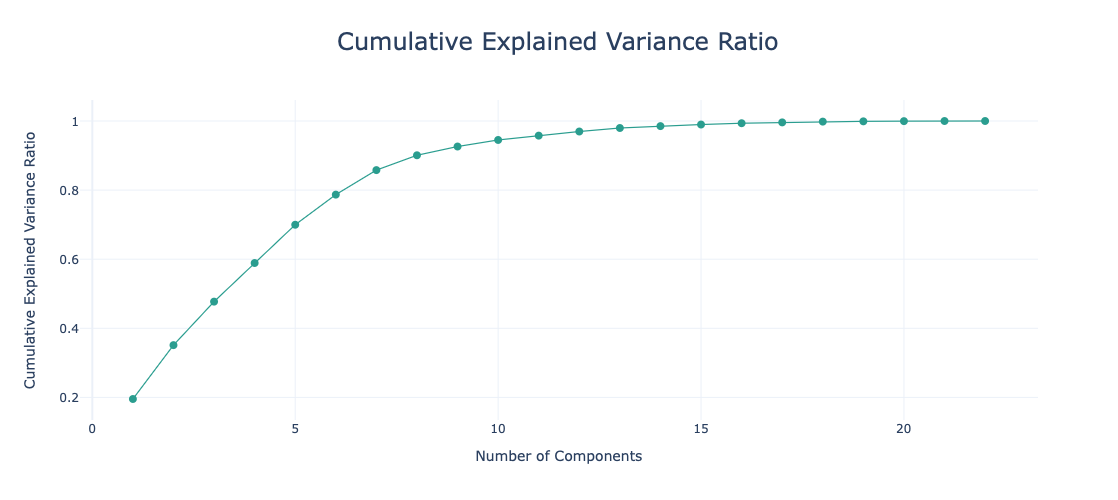

In [60]:
# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create trace for line with markers
trace = go.Scatter(x=list(range(1, len(cumulative_variance_ratio)+1)), 
                   y=cumulative_variance_ratio,
                   mode='lines+markers',
                   marker=dict(size=8, color='#2a9d8f'),
                   line=dict(width=1.2)
                  )

# Create layout
layout = go.Layout(title=dict(text='Cumulative Explained Variance Ratio', x=0.5, font=dict(size=24)),
                   xaxis=dict(title='Number of Components'),
                   yaxis=dict(title='Cumulative Explained Variance Ratio'),
                   template='plotly_white',
                   width=800, # increase the width of the plot
                   height=500, # increase the height of the plot
                  )

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show figure
fig.show()

In [61]:
# Look at loadings for each component
loads = pd.DataFrame(pca.components_, columns=X_fin.columns)

# Determine components with highest explained variance ratios
variances = pca.explained_variance_ratio_
highest_variances = np.argsort(variances)[::-1][:5]
print("Highest variance components: ", highest_variances)

# Look at variables with highest loadings for each of the most important components
for component in highest_variances:
    top_variables = loads.iloc[component].sort_values(ascending=False)[:5]
    print(f"\nComponent {component} - Top Variables:\n{top_variables}")

# Consider relationships between prominent variables and outcome variable

Highest variance components:  [0 1 2 3 4]

Component 0 - Top Variables:
TUE                             0.406906
FAF                             0.317995
CALC_no                         0.084846
MTRANS_Public_Transportation    0.074124
CAEC_Frequently                 0.068928
Name: 0, dtype: float64

Component 1 - Top Variables:
Age                0.230651
CALC_no            0.058819
CAEC_Frequently    0.036326
CAEC_no            0.003687
SMOKE_yes          0.002519
Name: 1, dtype: float64

Component 2 - Top Variables:
FAF            0.507950
Age            0.422031
NCP            0.230498
Gender_Male    0.144340
CH2O           0.132517
Name: 2, dtype: float64

Component 3 - Top Variables:
CH2O           0.605845
FAF            0.083259
Gender_Male    0.070531
BMI            0.058310
CAEC_no        0.035614
Name: 3, dtype: float64

Component 4 - Top Variables:
NCP     0.393195
TUE     0.374550
BMI     0.250474
Age     0.212470
CH2O    0.174002
Name: 4, dtype: float64


In [62]:
# Get the loadings of the significant components
loads = pca.components_

# Create a DataFrame to store the loadings
loads_df = pd.DataFrame(loads, columns=X_fin.columns)

# Identify the variables with the highest loadings in each component
component_vars = []
for i in range(len(loads)):
    component_vars.append(list(loads_df.iloc[i].nlargest(5).index))

# Determine the cumulative explained variance ratio for each component
cumulative_var_rat = np.cumsum(pca.explained_variance_ratio_)

# Create a summary table
summary_df = pd.DataFrame({
    'Component': range(1, len(loads)+1),
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance Ratio': cumulative_var_rat,
    'Top Variables': component_vars
})

# Print the summary table
summary_df.head(6)

Component  Explained Variance Ratio  Cumulative Explained Variance Ratio  \
0          1                  0.195364                             0.195364   
1          2                  0.155929                             0.351293   
2          3                  0.125879                             0.477172   
3          4                  0.111797                             0.588968   
4          5                  0.110763                             0.699731   
5          6                  0.087189                             0.786920   

                                       Top Variables  
0  [TUE, FAF, CALC_no, MTRANS_Public_Transportati...  
1  [Age, CALC_no, CAEC_Frequently, CAEC_no, SMOKE...  
2                 [FAF, Age, NCP, Gender_Male, CH2O]  
3             [CH2O, FAF, Gender_Male, BMI, CAEC_no]  
4                         [NCP, TUE, BMI, Age, CH2O]  
5                         [TUE, FAF, Age, FCVC, BMI]

### Clustering

In [63]:
# K-means: centroids-based clustering
X_clust = data_ord_encoding.iloc[:, [10,25]].values
print(X_clust)

[[3. 1.]
 [3. 1.]
 [3. 1.]
 ...
 [3. 6.]
 [3. 6.]
 [3. 6.]]


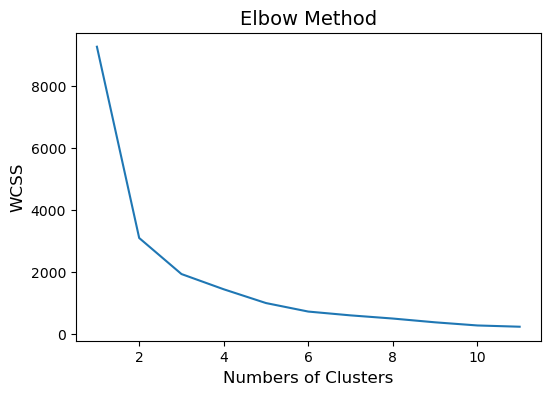

In [64]:
# Elbow Method: find out the number of clusters in K-means
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_clust)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (6,4))
plt.plot(range(1,12), wcss)
plt.xlabel('Numbers of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method', fontsize=14)
plt.show()

In [65]:
k = 9
kmeans = KMeans(n_clusters = 9, random_state = 0)
pred_kmeans = kmeans.fit_predict(X_clust)
print(pred_kmeans)

[0 0 0 ... 2 2 2]


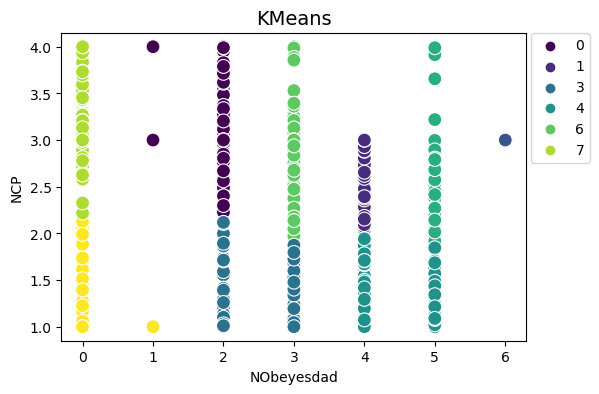

In [66]:
# Create a KMeans scatter plot with the between NObeyesdad and NCP
plt.figure(figsize = (6,4))
sns.scatterplot(data = data_ord_encoding, x = 'NObeyesdad', y = 'NCP', hue = pred_kmeans, palette = "viridis", s = 100)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("KMeans", fontsize=14)
plt.show()

#### The group of individuals with the highest levels of obesity and lowest frequency of main meals: cluster 2

In [67]:
# Add 'pred_k' as a column to 'data_ord_encoding'
data_ord_encoding['Cluster'] = pred_kmeans

# Calculate the average 'NObeyesdad' for each cluster
cluster_avg = data_ord_encoding.groupby('Cluster')['NObeyesdad'].mean()

# Find the cluster with the highest average 'NObeyesdad'
highest_cluster = cluster_avg.idxmax()
highest_avg = cluster_avg.max()

print("Cluster with Highest Average NObeyesdad:", highest_cluster)
print("Highest Average NObeyesdad Value:", highest_avg)


Cluster with Highest Average NObeyesdad: 2
Highest Average NObeyesdad Value: 6.0


In [68]:
# Understanding how the algorithm has grouped the data points based on their similarity
data_kmeans = data_iqr.copy()
data_kmeans['Cluster'] = pred_kmeans
print(data_kmeans.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad        BMI  Cluster  
0  Public_Transportation        Normal_Weight  24.386526        0  
1  Public_Transportation        Normal_W

In [69]:
# Examine Cluster 2
boolArray = data_kmeans['Cluster'] == 2
print(data_kmeans[boolArray])

      Gender        Age    Height      Weight family_history_with_overweight  \
202   Female  26.000000  1.560000  102.000000                            yes   
403   Female  26.000000  1.660000  112.000000                            yes   
498   Female  25.196214  1.686306  104.572712                            yes   
499   Female  18.503343  1.683124  126.673780                            yes   
500   Female  26.000000  1.622397  110.792630                            yes   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [70]:
# Silhouette Score when using 9 clusters for K-means clustering

# K-means clustering with 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
cluster_labels = kmeans.fit_predict(X_clust)
silhouette_avg = silhouette_score(X_clust, cluster_labels)

print("Silhouette Score K-means:", silhouette_avg)


Silhouette Score K-means: 0.6808676545257343


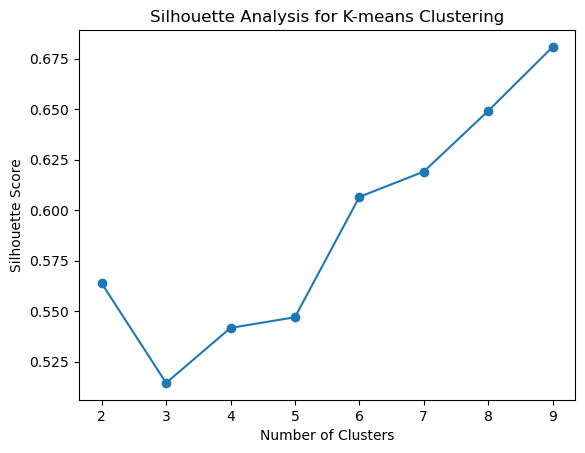

In [71]:
# Silhouette Analysis Plot for K-means
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_clust)
    silhouette_avg = silhouette_score(X_clust, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-means Clustering')
plt.show()


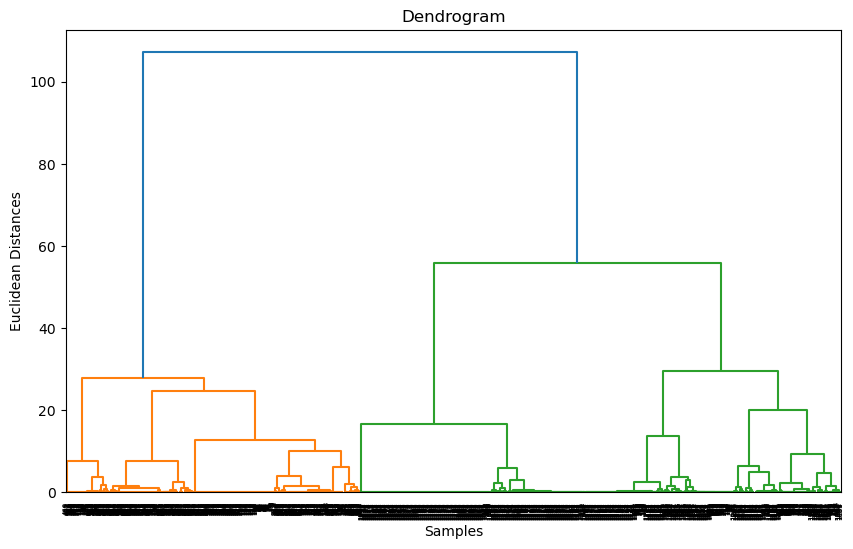

In [72]:
# Agglomerative Hierarchical

# Create dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_clust, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()



In [73]:
hierarchical = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward' )
pred_hierarchical = hierarchical.fit_predict(X_clust)

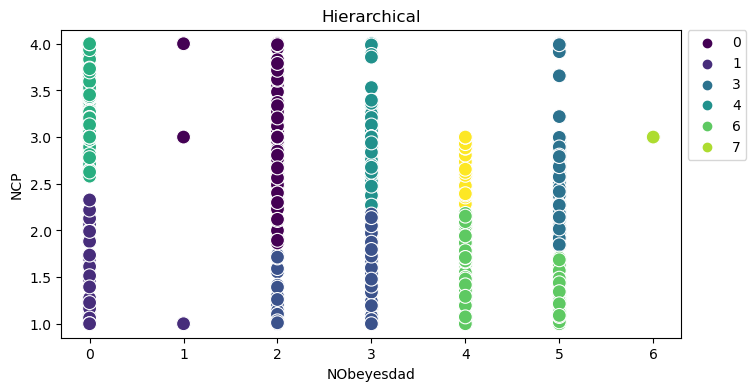

In [74]:
# Create a Hierarchical scatter plot 
plt.figure(figsize = (8,4))
sns.scatterplot(data = data_ord_encoding, x = 'NObeyesdad', y = 'NCP', hue = pred_hierarchical, palette = "viridis", s = 100)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Hierarchical", fontsize=12)
plt.show()

In [75]:
data_ord_encoding['Cluster'] = pred_hierarchical

# Calculate the average 'NObeyesdad' for each cluster
cluster_avg = data_ord_encoding.groupby('Cluster')['NObeyesdad'].mean()

# Find the cluster with the highest average 'NObeyesdad'
highest_cluster = cluster_avg.idxmax()
highest_avg = cluster_avg.max()

print("Cluster with Highest Average NObeyesdad:", highest_cluster)
print("Highest Average NObeyesdad Value:", highest_avg)

Cluster with Highest Average NObeyesdad: 7
Highest Average NObeyesdad Value: 6.0


In [76]:
# Create a copy of the original DataFrame with IQR data
data_hierarchical = data_iqr.copy()
# Add a new column 'Cluster' containing the predicted clusters from hierarchical clustering
data_hierarchical['Cluster'] = pred_hierarchical

print(data_hierarchical.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad        BMI  Cluster  
0  Public_Transportation        Normal_Weight  24.386526        0  
1  Public_Transportation        Normal_W

In [77]:
# Create a boolean array to filter rows where 'Cluster' is 7
boolArrayhc = data_hierarchical['Cluster'] == 7
print(data_hierarchical[boolArrayhc])

      Gender        Age    Height      Weight family_history_with_overweight  \
202   Female  26.000000  1.560000  102.000000                            yes   
403   Female  26.000000  1.660000  112.000000                            yes   
498   Female  25.196214  1.686306  104.572712                            yes   
499   Female  18.503343  1.683124  126.673780                            yes   
500   Female  26.000000  1.622397  110.792630                            yes   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [78]:
# Hierarchical Clustering
# Initialize variables to store best silhouette score and corresponding number of clusters
best_silhouette = -1
best_n_clusters = -1

# Try different number of clusters
for n_clusters in range(2, 10):
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    pred_agg = agg_cluster.fit_predict(X_clust)
    
    # Check if there are at least 2 unique clusters
    if len(np.unique(pred_agg)) > 1:
        silhouette = silhouette_score(X_clust, pred_agg)
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_n_clusters = n_clusters

print("Best Number of Hierarchical Clusters:", best_n_clusters)
print("Best Hierarchical Silhouette Score:", best_silhouette)


Best Number of Hierarchical Clusters: 9
Best Hierarchical Silhouette Score: 0.6769294291541226


In [91]:
# DBSCAN Clustering 
# Instantiate DBSCAN with parameterer
# Trial and error for min samples
dbscan = DBSCAN(eps=0.5, min_samples=15)

# Fit and predict clusters
pred_dbscan = dbscan.fit_predict(X_clust)

# Number of clusters (-1 indicates outliers)
num_clusters_dbscan = len(np.unique(pred_dbscan)) - 1

# Silhouette score
silhouette_dbscan = silhouette_score(X_clust, pred_dbscan)

print("Number of DBSCAN Clusters:", num_clusters_dbscan)
print("DBSCAN Silhouette Score:", silhouette_dbscan)


Number of DBSCAN Clusters: 9
DBSCAN Silhouette Score: 0.5362422784967668


In [93]:
data_ord_encoding['Cluster'] = pred_dbscan

# Calculate the average 'NObeyesdad' for each cluster
cluster_avg = data_ord_encoding.groupby('Cluster')['NObeyesdad'].mean()

# Find the cluster with the highest average 'NObeyesdad'
highest_cluster = cluster_avg.idxmax()
highest_avg = cluster_avg.max()

print("Cluster with Highest Average NObeyesdad:", highest_cluster)
print("Highest Average NObeyesdad Value:", highest_avg)

Cluster with Highest Average NObeyesdad: 8
Highest Average NObeyesdad Value: 6.0


In [89]:
data_dbscan = data_iqr.copy()
data_dbscan['Cluster'] = pred_dbscan
print(data_dbscan.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad        BMI  Cluster  
0  Public_Transportation        Normal_Weight  24.386526        0  
1  Public_Transportation        Normal_W

In [94]:
# Create a boolean array to filter rows where 'Cluster' is 9
boolArraydb = data_dbscan['Cluster'] == 8
print(data_dbscan[boolArraydb])

      Gender        Age    Height      Weight family_history_with_overweight  \
202   Female  26.000000  1.560000  102.000000                            yes   
403   Female  26.000000  1.660000  112.000000                            yes   
498   Female  25.196214  1.686306  104.572712                            yes   
499   Female  18.503343  1.683124  126.673780                            yes   
500   Female  26.000000  1.622397  110.792630                            yes   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

#### K-means has the highest Silhouette Score, indicating that it produced the best-defined and well-separated clusters for the given dataset